In [20]:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Pas de locatie aan van het bestand naar hoe het in jouw systeem zit
from functions.p4.decissionTrees import *

simpsN = pd.read_csv("datasets/simpsons_nominal.csv")
simps = pd.read_csv("datasets/simpsons.csv")

# Decision Trees

Het doel van een beslissingsboom is om informatie te kunnen voorspellen. Tot nu toe werd dit gedaan aan de hand van regressie en forecasting.
Een beslissingsboom is een model voor de weergave van alternatieven en keuzen in een besluitvormingsproces.
Een boom kan opgesteld worden door het capteren van expert knowledge (Expert Systems) of door het afleiden van rules uit empirische verzamelde data (Mahine Learning)
<br>
<img src="https://wcs.smartdraw.com/decision-tree/img/structure-of-a-decision-tree.png?bn=15100111874" width="500" height="359">

## Maken van een beslissingsboom
* Kies een kolom in de data, dit wordt je <font color="#ADD8E6">Root node</font>
* Maak een decision <font color="blue">node</font> voor deze kolom
* Maak pijlen naar kind-nodes voor iedere mogelijke waarde van deze kolom
* per pijl maak je een kindTabel waarin enkel die rijen voorkomen met de gekozen waarde
* Doe het algoritme recursief voor alle kind-nodes
* als alle rijen van de tabel eenzelfde uitkomst hebben, stop dan. Dit is je <font color='orange'>Leaf Node</font>

## ID$_{3}$ algorithme

### Theorie
Er zijn 2 belangrijke begrippen


#### Entropie
De entropie is de maatstaf voor de wanorde
Het is een waarde tussen 0 (=orde) en 1 (=totale wanorde)

##### Formule
E (tabel) = $\sum \limits_{klassen} - (\frac{p}{n}) * log_{2}(\frac{p}{n})$
$klassen$ = alle mogelijke waarden van het te voorspellen attribuut
$p$ = het aantal rijen met een bepaalde te voorspellen waarde
$n$ = het totaal aantal rijen in de tabel

In [13]:
#De entropie kan worden berekend met volgende functie
entropy(simpsN.geslacht)
#De functie verwacht een kolom van de tabel

0.9910760598382221

#### Information Gain
De information gain geeft de winst op het vlak van de orde weer
Hoe groter de waarde is hoe minder wanorde er is

##### Formule
Welke kolom moet er worden geselecteerd?
* De kolom die het meeste informatie bevat, die het meeste bijdraagt tot de orde


$Gain(kolom) = E(tabel) - \sum\limits_{waarden} (\frac{p}{n}) * E(kindtabel)$

$kindtabel$ = een tabel waarvan alle rijen dezelfde waarden hebben voor de gekoze kolom
$n$ = het aantal rijen in de tabel
$p$ = het aan rijen in de kindtabel
$E(tabel)$ = de Entropie

In [14]:
#De information gain kan worden berekend met volgende functie
information_gain(simpsN, 'haarlengte', 'geslacht')
#De functie verwacht een tabel, een kolom en een te voorspellen kolomb

0.45165906291896163

In [15]:
#Er kan snel worden berekend welke kolom het beste is om op te spliten via volgende functie
best_split(simpsN, 'geslacht')

('naam', 0.9910760598382221)

### Model

#### ID3Estimator & Graphviz packages installeren

* `pip install decision-tree-id-fork`
* Graphviz <a href="https://graphviz.org/download/">installeren</a> (nodig voor de visualisatie) door te downloaden van de website voor Windows en Mac en te installeren.
    *  Zorg ervoor dat je GraphViz toevoegt aan je PATH in de installatiewizard!
    *  Anders krijg je _ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH_
* `pip install graphviz` moet je ook nog doen

#### Trainen
Het ID3 model kan getraind worden via volgende functie. De functie zal het model zelf terug geven en de parameter die nodig is om de boom te visualiseren.

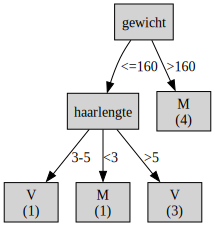

In [16]:
# Model is het model waarmee voorspellingen kunnen gemaakt worden
#Model_tree is de parameter nodig in de functie graphviz.Source() om de boom te visualiseren
model, model_tree = trainID3(simpsN, 'geslacht', ['naam'])
graphviz.Source(model_tree.dot_tree)

#### Voorspellen
Volgended functie kan worden gebruikt om een waarde te voorspellen

In [17]:
model.predict([['>5', '>160', '30-40']])

array(['M'], dtype='<U1')

### Problemen
Het ID3 model heeft wat 'problemen' waardoor het soms lastig is om te kunnen gebruiken. Dit komt omdat
* Alle waarden moeten kwalitatief zijn
* Kwantitatieve variabelen: eerst splitsen in categorieën (welke?)
* In de praktijk zijn er soms NA values, ID3 kan hier niet mee werken
* ...

### Alternatieven
C$_{4.5}$ of J$_{4}$8

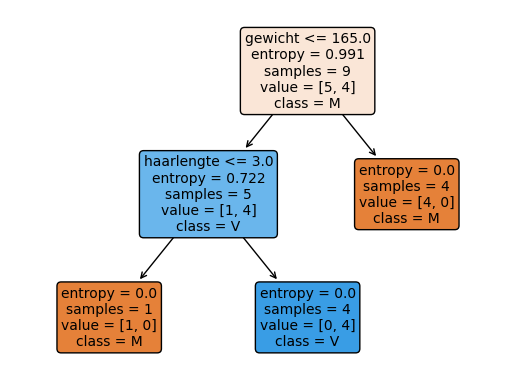

In [18]:
# Het nieuwe model kan getraind worden met volgende functie
model = trainDecisionTree(simps, 'geslacht', ['naam'])